In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## SampleRobotのロード

In [2]:
#from irsl_choreonoid.sample_robot import SampleRobot
#robot = SampleRobot.makeRobot() 

In [3]:
class SpecificRobotClass(ru.ImportedRobotModel):
    def __init__(self, robot=None, item=True, world=False, **kwargs):
        super().__init__(robot=robot, item=item, world=world, **kwargs)
    def _setting_before_init(self, robot, **kwargs):  ## override
        pass
    def _init_ending(self, **kwargs): ## override
       self.registerEndEffector('arm', ## end-effector
                  'L0', ## エンドエフェクタにつながるジョイント
                  joint_tuples = self.jointNames
                  )

SpecificRobotClass.model_file = 'graph_robot.body' ## 1. ##
robot_class = SpecificRobotClass ## 2. ##
robot = robot_class.makeRobot()

<class '__main__.SpecificRobotClass'>

### pose の angle-vectorを取得

In [4]:
robot.angleVector()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
#robot.setDefaultPose()
end = ([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
print(end.shape)

(33,)

In [6]:
robot.angleVector(end)

## シミュレーション環境の追加

In [7]:
ib.loadRobotItem(cutil.getShareDirectory() + '/model/misc/floor.body')
ib.loadRobotItem('box.body')
ib.loadRobotItem('red_box.body')

## シミュレーションの準備

In [29]:
from irsl_choreonoid.simulation_utils import SimulationEnvironment
#SimulationEnvironmentクラスのメソッドであるstartはsimという変数を持っていて、ib.addSimulator()の返り値から鳴っている
sim = SimulationEnvironment(robotName='graph_robot')

In [30]:
##
robot.robot.rootLink.setJointType(cbody.Link.FixedJoint)
##
for l in robot.linkList:
  l.setMass(l.mass/100)
  l.setInertia(l.I/1000)
  l.setEquivalentRotorInertia(1)

### 目標関節角度の設定

In [54]:
robot.angleVector()

array([-7.85422756e-08,  0.00000000e+00,  0.00000000e+00, -7.85387469e-08,
        0.00000000e+00,  0.00000000e+00, -7.85321134e-08,  0.00000000e+00,
        0.00000000e+00, -7.85227992e-08,  0.00000000e+00,  0.00000000e+00,
       -7.85112283e-08,  0.00000000e+00,  0.00000000e+00, -7.84978248e-08,
        0.00000000e+00,  0.00000000e+00, -7.84830126e-08,  0.00000000e+00,
        0.00000000e+00, -7.84603576e-08,  0.00000000e+00,  0.00000000e+00,
       -7.84566919e-08,  0.00000000e+00,  0.00000000e+00, -7.84603576e-08,
        0.00000000e+00,  0.00000000e+00, -7.84566919e-08,  0.00000000e+00,
        0.00000000e+00])

In [56]:
robot.setDefaultPose()
cds = coordinates([-1,0.9,-2.5])
#cds = coordinates([0,0,0])
ret = robot.fullBodyIK([cds] ,[robot.arm], constraint='xy')

In [57]:
ret

(True, 0)

In [58]:
cds = coordinates([-1,0.9,-2.5])
ret = robot.fullBodyIK([cds] ,[robot.arm], constraint='xyz')
ret

(False, 32)

In [59]:
robot.angleVector()

array([ 3.59701540e-01,  5.57835696e-01, -7.46743626e-02, -5.58189894e-02,
       -1.92329753e-05, -7.44162452e-02, -4.17962784e-01, -4.46094611e-01,
       -7.62118459e-02, -6.43060965e-01, -6.50246186e-01, -6.14117643e-02,
       -6.60225296e-01, -5.83795269e-01, -2.09606067e-02, -4.11568421e-01,
       -3.37870090e-01, -4.97117744e-18, -7.84830126e-08,  0.00000000e+00,
        0.00000000e+00, -7.84603576e-08,  0.00000000e+00,  0.00000000e+00,
       -7.84566919e-08,  0.00000000e+00,  0.00000000e+00, -7.84603576e-08,
        0.00000000e+00,  0.00000000e+00, -7.84566919e-08,  0.00000000e+00,
        0.00000000e+00])

In [60]:
ret = robot.angleVector()

### シミュレーション スタート

In [61]:
sim.start()

In [62]:
sim.sequencer.pushNextAngle(end, 5.0)

In [63]:
sim.run(10)

### シミュレーション実行

In [21]:
sim.run(10)

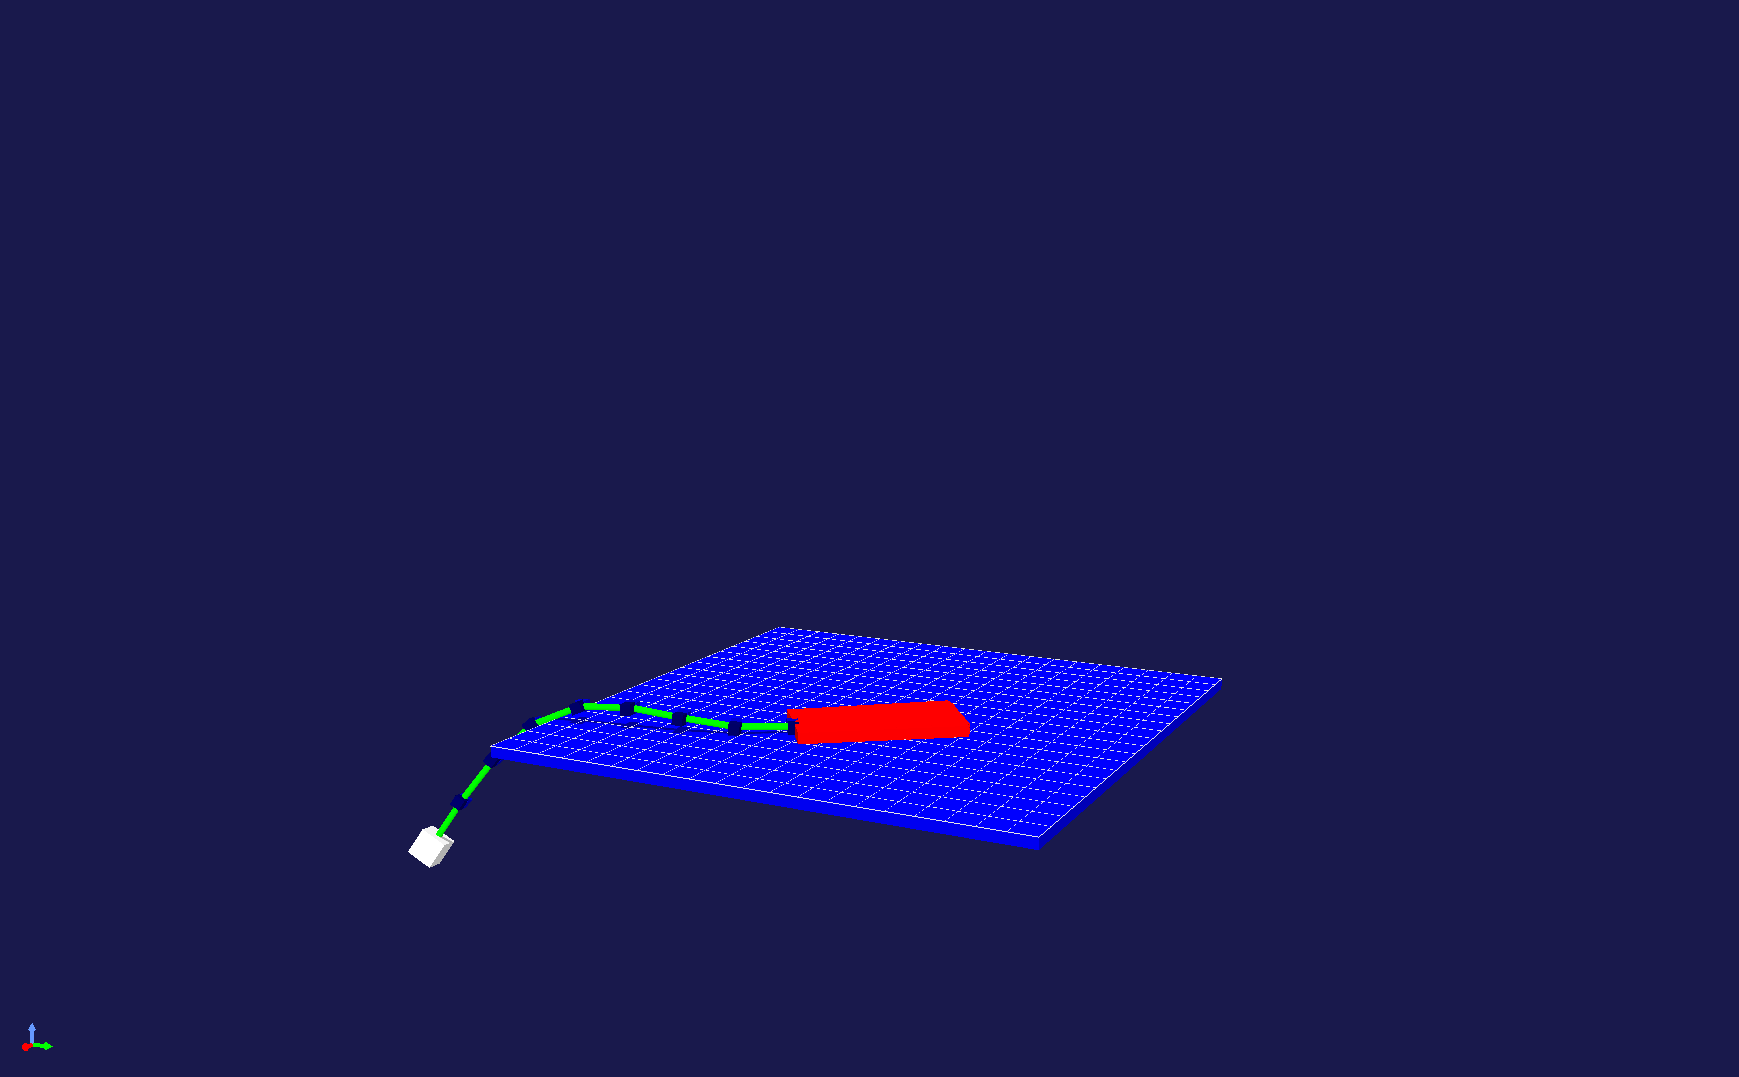

In [22]:
%display